In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hdf=pd.read_csv("D:\Aditi_2021\ML\Housing.csv")
hdf.shape

(545, 13)

In [3]:
hdf.dropna() #dropping null values
hdf.shape

(545, 13)

In [4]:
hdf[:5]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Exploratory Data Analysis

<AxesSubplot:xlabel='area', ylabel='price'>

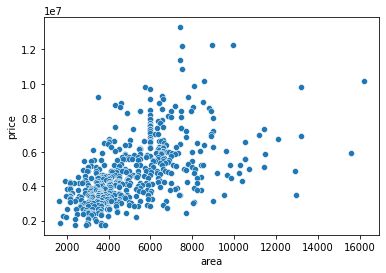

In [5]:
sns.scatterplot(x="area",y="price",data=hdf)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

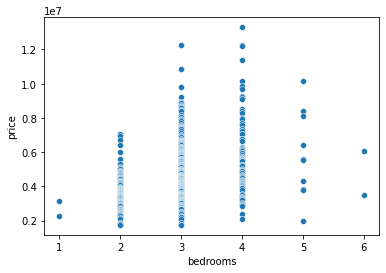

In [6]:
sns.scatterplot(x='bedrooms',y="price",data=hdf)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

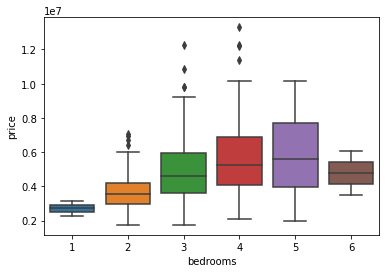

In [7]:
sns.boxplot(y="price",x='bedrooms',data=hdf)

### removing outliers

In [8]:
hdf["price"].describe(percentiles=[.25,.5,.6,.7,.8,.9,.95])

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
60%      4.830000e+06
70%      5.418000e+06
80%      6.093500e+06
90%      7.350000e+06
95%      8.400000e+06
max      1.330000e+07
Name: price, dtype: float64

In [9]:
iqr=hdf["price"].quantile(q=.75)-hdf["price"].quantile(q=.25)

In [10]:
thmax=hdf["price"].quantile(q=.75)+1.5*iqr

In [11]:
hdf[hdf["price"]>thmax].shape

(15, 13)

In [12]:
hdf=hdf[~(hdf["price"]>thmax)] # df_new=df[df["Price"]<=thmax]

In [13]:
hdf.shape

(530, 13)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

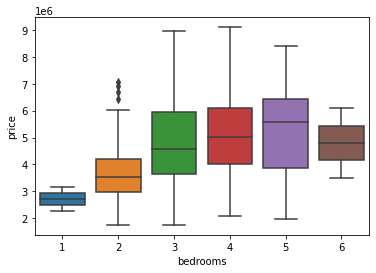

In [14]:
sns.boxplot(y="price",x='bedrooms',data=hdf)

<AxesSubplot:xlabel='area', ylabel='price'>

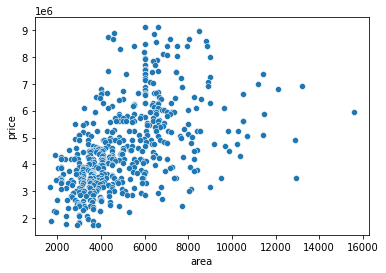

In [15]:
sns.scatterplot(x="area",y="price",data=hdf)

<AxesSubplot:xlabel='area', ylabel='price'>

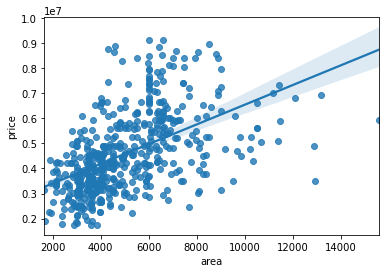

In [16]:
sns.regplot(x="area",y="price",data=hdf)

In [17]:
# we can see a linear pattern

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

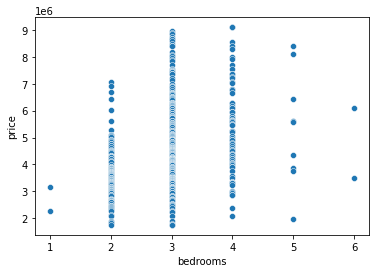

In [18]:
sns.scatterplot(x='bedrooms',y="price",data=hdf)

## Prediction with Linear Regression

In [19]:
X=hdf.drop("price",axis=1)
y=hdf["price"]
#y is to be predicted

In [20]:
hdf.columns[:]

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [21]:
contcols=["area","bedrooms","bathrooms","stories","parking"]
objcols=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
#dividing columns into continuous and discrete variables

In [22]:
Xohe=pd.get_dummies(X,columns=objcols,drop_first=True)
#converting string (if any) to integer values

In [23]:
X.shape

(530, 12)

In [24]:
from sklearn import model_selection
from sklearn import preprocessing

In [25]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(Xohe,y,test_size=.2,random_state=100)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

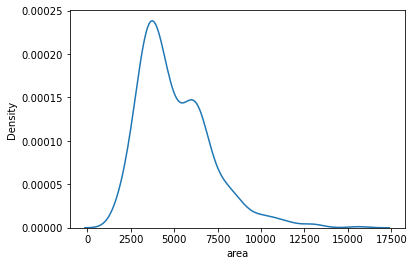

In [26]:
sns.distplot(hdf["area"],hist=False)

In [27]:
#graph looks normally distributed so we will use StandardScaler

In [28]:
scaler=preprocessing.StandardScaler()

In [29]:
Xtrain[contcols]=scaler.fit_transform(Xtrain[contcols])
Xtest[contcols]=scaler.transform(Xtest[contcols])
#fit and transform for train data
#transform the test data

<ipython-input-29-dad0f44dccb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain[contcols]=scaler.fit_transform(Xtrain[contcols])
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-29-dad0f44dccb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

## studying summary via statsmodel

In [30]:
import statsmodels.api as sm

In [31]:
Xtrain_1 = sm.add_constant(Xtrain)

In [32]:
lrobj = sm.OLS(ytrain, Xtrain_1)

In [33]:
smmodel=lrobj.fit()

In [34]:
smmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     60.11
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           2.07e-86
Time:                        04:28:51   Log-Likelihood:                -6430.9
No. Observations:                 424   AIC:                         1.289e+04
Df Residuals:                     410   BIC:                         1.295e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            3.736e+06   1.66e+05     22.556      0.000    3.41e+06    4.06e+06
area                             4.532e+05   5.35e+04      8.464      0.000    3.48e+05    5.58e+05
bedrooms                         4.067e+04   5.39e+04      0.755      0.451   -6.52e+04    1.47e+05
bathrooms                        3.498e+05   5.13e+04      6.817      0.000    2.49e+05    4.51e+05
stories                          4.093e+05   5.49e+04      7.463      0.000    3.02e+05    5.17e+05
parking                           1.52e+05   5.03e+04      3.023      0.003    5.32e+04    2.51e+05
mainroad_yes                     4.118e+05    1.4e+05      2.939      0.003    1.36e+05    6.87e+05
guestroom_yes                    2.653e+05   1.33e+05      1.988      0.047    2991.537    5.28e+05
basement_yes                     4.039e+05   1.12e+05      3.618      0.000    1.84e+05    6.23e+05
hotwaterheating_yes              8.181e+05   2.28e+05      3.593      0.000    3.71e+05    1.27e+06
airconditioning_yes              8.018e+05   1.09e+05      7.345      0.000    5.87e+05    1.02e+06
prefarea_yes                     6.375e+05   1.23e+05      5.199      0.000    3.96e+05    8.79e+05
furnishingstatus_semi-furnished  5.479e+04   1.18e+05      0.462      0.644   -1.78e+05    2.88e+05
furnishingstatus_unfurnished    -3.667e+05    1.3e+05     -2.822      0.005   -6.22e+05   -1.11e+05
==============================================================================
Omnibus:                       44.458   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.706
Skew:                           0.666   Prob(JB):                     9.89e-17
Kurtosis:                       4.549   Cond. No.                         7.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#below are the conclusions from statsmodel summary

### a) Prob(F-statistic) => probablity of getting F-statistic: 60.11 = 2.07 * 10^(-86) (its almost zero)
### hence, f-statistic is significant
## Since, Prob(F-stat) < 0.5 => model is significant

### b) if "P|t|<0.5" => weight is significant
### hence, furnishingstatus_semi-furnished is not significant

In [36]:
from sklearn import feature_selection
from sklearn import linear_model

## Prediction with Sklearn

In [37]:
estimator=linear_model.LinearRegression()

In [38]:
rfeobj=feature_selection.RFE(estimator,n_features_to_select=6)  # classname ==> RFE  (Recursive Feature Elemination)

In [39]:
rfeobj.fit(Xtrain,ytrain)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [40]:
Xtrain.columns[rfeobj.support_]  # find important columns using boolean indexing

Index(['area', 'stories', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes'],
      dtype='object')

In [41]:
trainpred=rfeobj.predict(Xtrain)  #prediction on training data

In [42]:
errors=ytrain-trainpred #finding error values

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

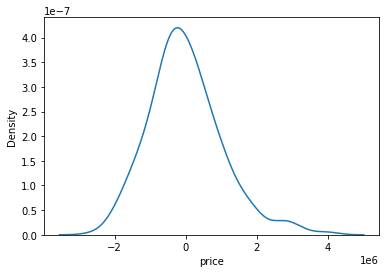

In [43]:
sns.distplot(errors,hist=False)

In [44]:
#error values in the above histogram show normal distribution => Linear Regression condition is satisfied

### Prediction on test data

In [45]:
testpred=rfeobj.predict(Xtest) # predicting using LinearRegression

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


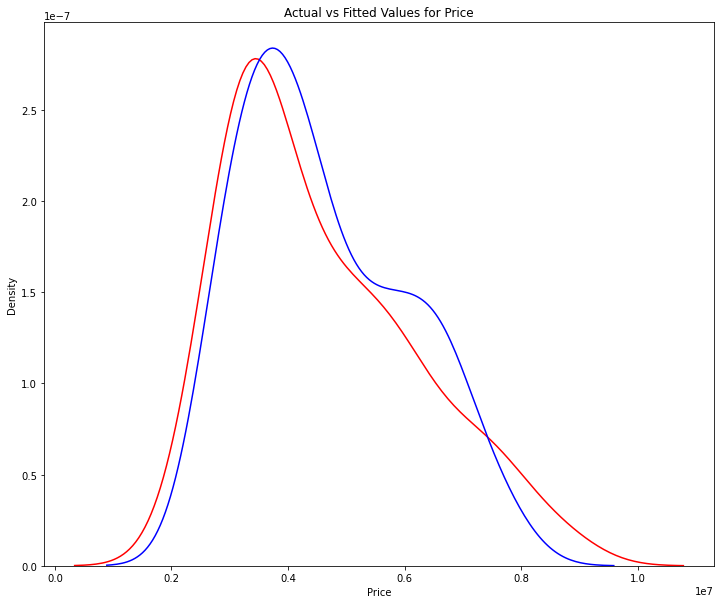

In [46]:
plt.figure(figsize=(12,10))
ax1=sns.distplot(ytest, hist=False, color="r",label="Actual Value")
sns.distplot(testpred,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')

plt.show()
plt.close()

In [47]:
from sklearn import metrics

In [48]:
print('The R-square is: ', metrics.r2_score(ytest,testpred))

The R-square is:  0.5556411831881359
